In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Tau:
    def __init__(self):
        self.vectors = [np.array([0,1]),np.array([1,0]),np.array([0,-1]),"stall"]
    def __mul__(self, b):
        return b

    def __pow__(self,n):
        return tau

    def __getitem__(self,i):
        return self.vectors[i]

class Sigma_1:
    def __init__(self):
        self.vectors = [np.array([1,0]),np.array([0,1]),np.array([-1,0]),"stall"]
        
    def __mul__(self, b):
        if b == tau:
            return sigma_1
        if b == sigma_1:
            return tau
        if b == sigma_2:
            return sigma_3
        if b == sigma_3:
            return sigma_2
            
    def __getitem__(self,i):
        return self.vectors[i]
        
    def __pow__(self,n):
        if n == 0:
            return tau
        result = sigma_1
        for i in range(n-1):
            result *= sigma_1
        return result


class Sigma_2:
    def __init__(self):
        self.vectors = [np.array([-1,0]),np.array([0,-1]),np.array([1,0]),"stall"]
        
    def __mul__(self, b):
        if b == tau:
            return sigma_2
        if b == sigma_1:
            return sigma_3
        if b == sigma_2:
            return tau
        if b == sigma_3:
            return sigma_1

    def __getitem__(self,i):
        return self.vectors[i]

    def __pow__(self,n):
        if n == 0:
            return tau
        result = sigma_2
        for i in range(n-1):
            result *= sigma_2
        return result
        

class Sigma_3:
    def __init__(self):
        self.vectors = [np.array([0,-1]),np.array([-1,0]),np.array([0,1]),"stall"]
    def __getitem__(self,i):
        return self.vectors[i]
    def __mul__(self, b):
        if b == tau:
            return sigma_3
        if b == sigma_1:
            return sigma_2
        if b == sigma_2:
            return sigma_1
        if b == sigma_3:
            return tau



def base4(number, degree):
    result = [0 for i in range(degree)]
    for i in range(degree):
        result[-i-1]=number%4
        number = number//4

    return result


In [7]:
sigma_1 = Sigma_1()
sigma_2 = Sigma_2()
sigma_3 = Sigma_3()
tau = Tau()

d = 4
init = sigma_1**(d)
origin = np.array([0,0])
orderedGuiderList = [sigma_1,tau,tau,sigma_2]
positionsList = []
positionsList.append(np.copy(origin))
endFlag = 0
for i in range(4**d):
    ID = base4(i,d) ## for instance ID = [1,3,2] when degree=3
    currentMoveGuideList = [] ## for example moveGuide=[tau,sigma_1,tau] for d=3
    currentMoveGuideList.append(tau)
    counter = 0
    for base4ID in ID[:-1]:
        currentMoveGuideList.append((currentMoveGuideList[-1])*orderedGuiderList[base4ID])
        counter += 1

    counter = 0
    mover = currentMoveGuideList[-1-counter]
    while mover[ID[-1-counter]] == "stall":
        counter += 1
        if (counter == d):
            endFlag = 1
            break
        mover = currentMoveGuideList[-1-counter]

    # print(mover[ID[-1-counter]])
    if (endFlag == 0):
       origin += mover[ID[-1-counter]] 
        
    positionsList.append(np.copy(origin))



    
positionsList = np.array(positionsList)

/tmp/ipykernel_78342/1029473263.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while mover[ID[-1-counter]] == "stall":


(-0.75, 15.75, -0.75, 15.75)

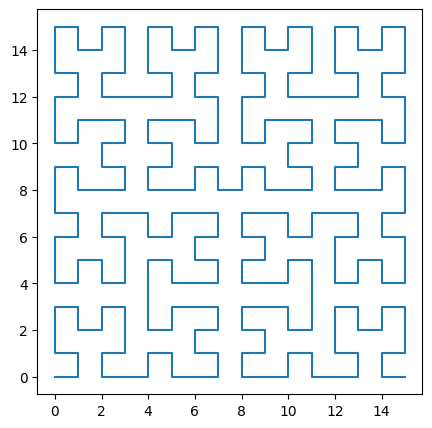

In [8]:
fig = plt.figure(figsize=(5,5))
plt.plot(positionsList[:,0],positionsList[:,1])
plt.axis("square")